<a href="https://colab.research.google.com/github/Aymane-Machay/ChessAppCs/blob/master/Plant%20Care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
import matplotlib as mpl
if os.environ.get('DISPLAY','') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import matplotlib.pyplot as plt

no display found. Using non-interactive Agg backend


In [26]:
!git clone https://github.com/Aymane-Machay/Plant-Care

fatal: destination path 'Plant-Care' already exists and is not an empty directory.


In [27]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import random

In [38]:
def load_dataset():
    raw = []
    c = 0
    test_image = []
    test_label = []
    train_image = []
    train_label = []
    rootdir = "/content/Plant-Care/Dataset"
    for subdir, dirs, files in os.walk(rootdir):
        if subdir != rootdir:
            label = subdir[len(rootdir)+1:]
            #Optionellement on peut séparer les label en pair Espèce, Maladie
            #pch = label.split("___")
            #specie_label = pch[0]
            #status_label = pch[1]
            for file in files:
              path = subdir+"/"+ file
              image = Image.open(path)
              transform = transforms.Compose([transforms.PILToTensor()])
              img_tensor = transform(image)
              raw.append((img_tensor,label))
    random.shuffle(raw)
    for item in raw:
      if c<3999:
        test_image.append(item[0])
        test_label.append(item[1])
      else:
        train_image.append(item[0])
        train_label.append(item[1])
      c=c+1
    return (train_image, train_label, test_image, test_label)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(40))

In [ ]:
rootdir = "/content/Plant-Care/Dataset"
ds_train= tf.keras.preprocessing.image_dataset_from_directory(
	rootdir,
	labels='inferred',
	label_mode = "int",
	class_names=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'],
	color_mode = 'rgb',
	batch_size = 4,
	image_size = (32,32),
	shuffle = True,
	seed = 123,
	validation_split = 0.1,
	subset = "training",
)

ds_validate= tf.keras.preprocessing.image_dataset_from_directory(
	rootdir,
	labels='inferred',
	label_mode = "int",
	class_names=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'],
	color_mode = 'rgb',
	batch_size = 4,
	image_size = (32,32),
	shuffle = True,
	seed = 123,
	validation_split = 0.1,
	subset = "validation",
)

Found 54305 files belonging to 38 classes.
Using 48875 files for training.
Found 54305 files belonging to 38 classes.
Using 5430 files for validation.


In [ ]:
#train_images, test_images = train_images / 255.0, test_images / 255.0
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(ds_train, epochs=10, verbose=2)

Epoch 1/10
12219/12219 - 178s - loss: 1.9064 - accuracy: 0.4778 - 178s/epoch - 15ms/step
Epoch 2/10
12219/12219 - 176s - loss: 1.1730 - accuracy: 0.6575 - 176s/epoch - 14ms/step
Epoch 3/10
12219/12219 - 187s - loss: 1.0317 - accuracy: 0.6979 - 187s/epoch - 15ms/step
Epoch 4/10
12219/12219 - 194s - loss: 0.9699 - accuracy: 0.7149 - 194s/epoch - 16ms/step
Epoch 5/10
12219/12219 - 188s - loss: 0.9554 - accuracy: 0.7221 - 188s/epoch - 15ms/step
Epoch 6/10
12219/12219 - 182s - loss: 0.9209 - accuracy: 0.7320 - 182s/epoch - 15ms/step
Epoch 7/10
12219/12219 - 186s - loss: 0.9020 - accuracy: 0.7372 - 186s/epoch - 15ms/step
Epoch 8/10
12219/12219 - 182s - loss: 0.9151 - accuracy: 0.7380 - 182s/epoch - 15ms/step
Epoch 9/10
12219/12219 - 181s - loss: 0.9259 - accuracy: 0.7355 - 181s/epoch - 15ms/step
Epoch 10/10
12219/12219 - 175s - loss: 0.8883 - accuracy: 0.7416 - 175s/epoch - 14ms/step


In [ ]:
test_loss, test_acc = model.evaluate(ds_validate, verbose=2)
print(test_acc)

1358/1358 - 11s - loss: 1.1709 - accuracy: 0.6924 - 11s/epoch - 8ms/step
0.6924493312835693


In [ ]:
model.save("PlantCare.h5")

In [ ]:
from google.colab import files
files.download('PlantCare.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
from tkinter import *
from PIL import ImageTk,Image
from keras.preprocessing import image
import os




cur_dir=os.getcwd()
root = Tk()
root.title("Plant Care")
root.iconbitmap('@'+cur_dir+'/PC-icon.xbm')
img_list = []
img_class= []

for subdir, dirs, files in os.walk(cur_dir+'/Data'):
  for file in files:
    path = subdir+"/"+file
    img_list.append(ImageTk.PhotoImage(file=path))
    img = image.load_img(path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    img_class.append(model.predict(img_preprocessed))
    

img_label = Label(root, image= img_list[0])
text_label = Label(root, text=img_class[0])
img_label.grid(row=0, column=0, columnspan=3)
text_label.grid(row=2, column=0)

def forward(img_num):
  global img_label
  global forward_button
  global back_button

  next = img_num
  img_label.grid_forget()
  img_label = Label(image = img_list[img_num])
  if img_num!=len(img_list):
    next = img_num+1
  forward_button= Button(root, text=">>", command=lambda: forward(next))
  back_button= Button(root, text="<<", command=lambda: back(img_num-1))

  img_label.grid(row=0, column=0, columnspan=3)
  back_button.grid(row=1, column=0)
  forward_button.grid(row=1, column=2)

def back(img_num):
  global img_label
  global forward_button
  global back_button

  previous = 0
  img_label.grid_forget()
  img_label = Label(image = img_list[img_num])
  if img_num!=0:
    next = img_num-1
  forward_button= Button(root, text=">>", command=lambda: forward(img_num+1))
  back_button= Button(root, text="<<", command=lambda: back(previous))

  img_label.grid(row=0, column=0, columnspan=3)
  back_button.grid(row=1, column=0)
  forward_button.grid(row=1, column=2)

back_button= Button(root, text="<<", command=lambda: back(0))
forward_button= Button(root, text=">>", command=lambda: forward(1))

back_button.grid(row=1, column=0)
forward_button.grid(row=1, column=2)

root.mainloop()


TclError: ignored

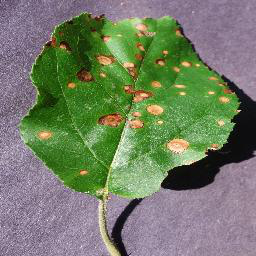

Expected Class: Apple___Black_rot.JPG
Predicted Class Apple___Black_rot


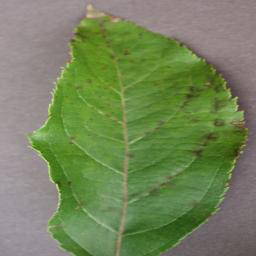

Expected Class: Apple___Apple_scab.JPG
Predicted Class Apple___Apple_scab


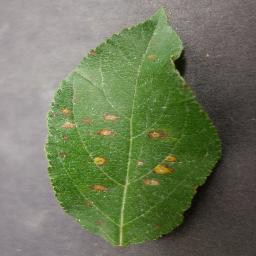

Expected Class: Apple___Cedar_apple_rust.JPG
Predicted Class Apple___Cedar_apple_rust


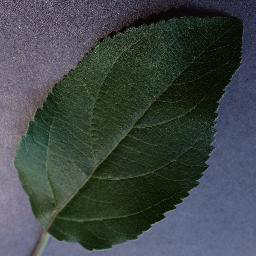

Expected Class: Apple___healthy.JPG
Predicted Class Apple___healthy


In [37]:
import tensorflow as tf
from tkinter import *
from PIL import ImageTk,Image
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import decode_predictions
import os

new_model = tf.keras.models.load_model('Plant-Care/Models/Apple.h5')
cur_dir=os.getcwd()
class_names=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


for subdir, dirs, files in os.walk('Plant-Care/General_Test_Data'):
  for file in files:
    path = subdir+"/"+file    
    display(Image.open(path))
    print("Expected Class:", file)
    img = image.load_img(path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = new_model.predict([img_preprocessed])
    print("Predicted Class",class_names[np.argmax(prediction)])



  
